## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

df = pd.read_csv("data/bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD9E854790>,
      dtype=object)

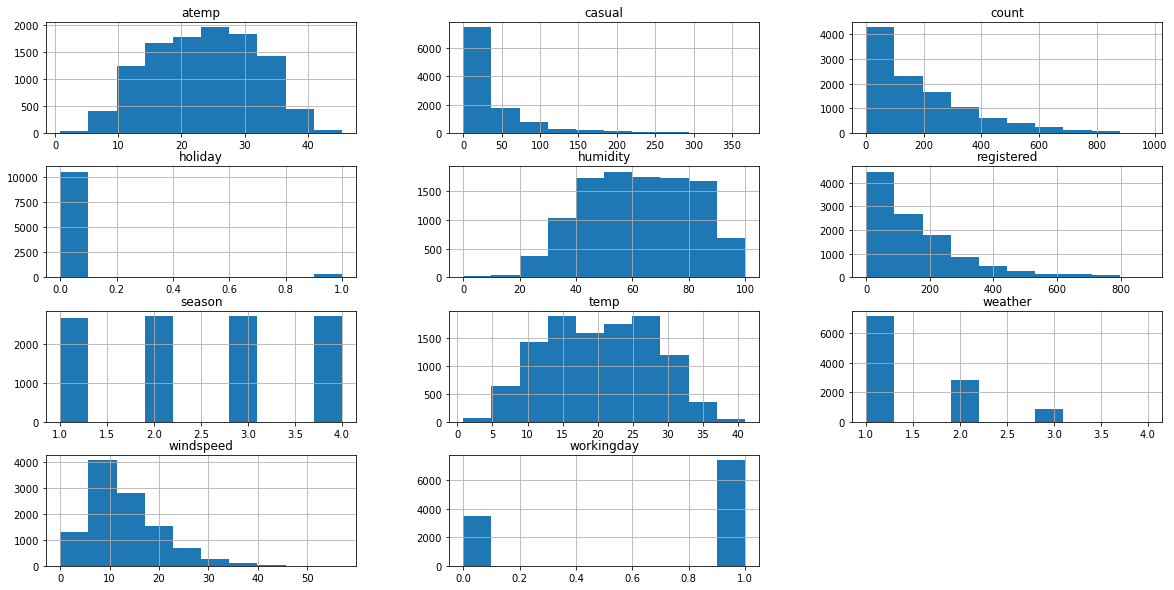

In [57]:
### YOUR CODE HERE ###
plt.rcParams["figure.figsize"] = (20,10)
df.hist()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [58]:
### YOUR CODE HERE ###
from scipy.stats import mode

df2 = df.describe()
df2.drop(["min", "max", "25%"], inplace=True)
d = df2.to_dict()

def perc99(x):
    return np.percentile(x, 99)

def add_row(d, func, name):
    for key, _ in d.items():
        d[key][name] = func(df[key])

add_row(d, perc99, "99%")
add_row(d, mode, "modes")
    
df2 = pd.DataFrame(d)
df2

#Пока ничего нельзя сказать по поводу аномалий, есть данные не нормального распределения, бимодальные данные,
#но явных выбросов нет

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
mean,2.50661,0.0285688,0.680875,1.41843,20.2309,23.6551,61.8865,12.7994,36.022,155.552,191.574
std,1.11617,0.166599,0.466159,0.633839,7.79159,8.4746,19.245,8.16454,49.9605,151.039,181.144
50%,3,0,1,1,20.5,24.24,62,12.998,17,118,145
75%,4,0,1,2,26.24,31.06,77,16.9979,49,222,284
99%,4,1,1,3,36.08,40.15,100,35.0008,240.15,697,774.15
modes,"([4], [2734])","([0], [10575])","([1], [7412])","([1], [7192])","([14.76], [467])","([31.06], [671])","([88], [368])","([0.0], [1313])","([0], [986])","([3], [195])","([5], [169])"


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [59]:
### YOUR CODE HERE ###
from scipy.stats import moment

d = df2.to_dict()

def assym(x): return moment(x, 3)/(np.std(x)**3)

def eccess(x): return moment(x, 4)/(np.std(x)**4) - 3.0

add_row(d, assym, "assymmetry")
add_row(d, eccess, "eccess")

df2 = pd.DataFrame(d)
df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
mean,2.50661,0.0285688,0.680875,1.41843,20.2309,23.6551,61.8865,12.7994,36.022,155.552,191.574
std,1.11617,0.166599,0.466159,0.633839,7.79159,8.4746,19.245,8.16454,49.9605,151.039,181.144
50%,3,0,1,1,20.5,24.24,62,12.998,17,118,145
75%,4,0,1,2,26.24,31.06,77,16.9979,49,222,284
99%,4,1,1,3,36.08,40.15,100,35.0008,240.15,697,774.15
modes,"([4], [2734])","([0], [10575])","([1], [7412])","([1], [7192])","([14.76], [467])","([31.06], [671])","([88], [368])","([0.0], [1313])","([0], [986])","([3], [195])","([5], [169])"
assymmetry,-0.0070747,5.65974,-0.776056,1.24331,0.00369034,-0.102545,-0.0863233,0.588685,2.4954,1.52459,1.2419
eccess,-1.35559,30.0326,-1.39774,0.3948,-0.914661,-0.850236,-0.76002,0.629292,7.54761,2.62432,1.29894


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [60]:
### YOUR CODE HERE ###
#Самую большую дисперсию имеет метрика count
from statsmodels.stats.proportion import proportion_confint

mean = np.mean(df["count"])
std = np.std(df["count"])
n = len(df["count"])

alpha = 0.95  #три сигмы
#Считаем Z
z = stats.norm.ppf(alpha)
#Интервал
mean - z*std/np.sqrt(n), mean + z*std/np.sqrt(n)

(188.71852657457234, 194.42973725052414)

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [61]:
### YOUR CODE HERE ###

def count_outcasts(x):
    x_inf = np.mean(x) - 3 * np.std(x)
    x_sup = np.mean(x) + 3 * np.std(x)
    return len(x[x>x_sup]) + len(x[x<x_inf])

add_row(d, count_outcasts, "outcasts")
df2 = pd.DataFrame(d)
df2

#Больше всего выбросов в метрике holiday

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
mean,2.50661,0.0285688,0.680875,1.41843,20.2309,23.6551,61.8865,12.7994,36.022,155.552,191.574
std,1.11617,0.166599,0.466159,0.633839,7.79159,8.4746,19.245,8.16454,49.9605,151.039,181.144
50%,3,0,1,1,20.5,24.24,62,12.998,17,118,145
75%,4,0,1,2,26.24,31.06,77,16.9979,49,222,284
99%,4,1,1,3,36.08,40.15,100,35.0008,240.15,697,774.15
modes,"([4], [2734])","([0], [10575])","([1], [7412])","([1], [7192])","([14.76], [467])","([31.06], [671])","([88], [368])","([0.0], [1313])","([0], [986])","([3], [195])","([5], [169])"
assymmetry,-0.0070747,5.65974,-0.776056,1.24331,0.00369034,-0.102545,-0.0863233,0.588685,2.4954,1.52459,1.2419
eccess,-1.35559,30.0326,-1.39774,0.3948,-0.914661,-0.850236,-0.76002,0.629292,7.54761,2.62432,1.29894
outcasts,0,311,0,1,0,0,22,67,292,235,147


### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610 

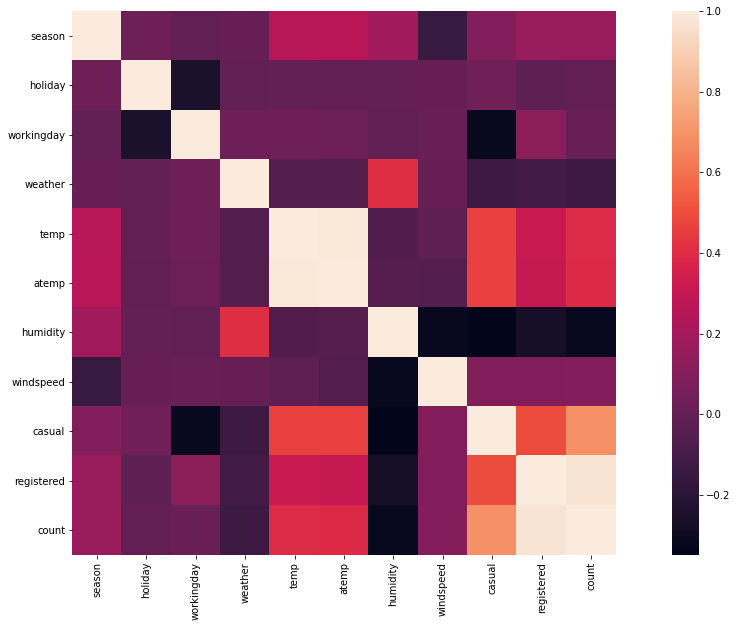

In [62]:
### YOUR CODE HERE ###
#Корреляция методом Пирсона
corr_matrix = df.corr(method="pearson")

print(corr_matrix)

sns.heatmap(df.corr(), square=True)

#Из heatmap видно, что наибольшее влияние на целевую переменную count (число арендуемых велосипедов) оказывает температура и признак casual
#Также связаны метрики weather и humidity